In [1]:
import torch
def getW(path):
    try:
        checkpoint = torch.load(path, map_location='cpu' , weights_only=False)
        print(f"成功加载 checkpoint 文件: {path}\n")
    except FileNotFoundError:
        print(f"错误：未找到文件 {path}。请检查路径是否正确。")
        return None
    except Exception as e:
        print(f"加载文件时发生错误: {e}")
        return None
    print("尝试读取Wq")
    Wq = checkpoint['model']['layers.3.blocks.0.cross_attn_token_to_image.in_proj_weight']
    print(Wq.shape)
    print(Wq)
    print(f"q的均值:{Wq.mean()} , q的方差:{Wq.std()}")
    return Wq

In [2]:
checkpoint0 = "/home/u2023110769/code/RMT/classfication_release/work_dirs/tokengalerkin_v2/backup0.pth"
checkpoint200 = "/home/u2023110769/code/RMT/classfication_release/work_dirs/tokengalerkin_v2/checkpoint.pth"
q0 = getW(checkpoint0)

# q200 = checkpoint = torch.load(checkpoint0, map_location='cpu' , weights_only=False)['model']['layers.0.q_pos'][0]
q200 = getW(checkpoint200)

成功加载 checkpoint 文件: /home/u2023110769/code/RMT/classfication_release/work_dirs/tokengalerkin_v2/backup0.pth

尝试读取Wq
torch.Size([1536, 512])
tensor([[ 3.6040e-02, -9.1660e-03,  1.4731e-02,  ...,  4.4917e-02,
          1.3412e-03, -3.2134e-02],
        [ 3.6780e-02, -2.5936e-02,  1.2186e-02,  ..., -4.7759e-02,
         -5.1987e-02, -1.7418e-02],
        [-2.5841e-02, -8.7932e-03,  3.4007e-02,  ...,  3.8924e-03,
         -3.9532e-02, -2.2812e-03],
        ...,
        [-1.7206e-02,  1.0462e-02, -4.8841e-02,  ...,  1.3794e-02,
          3.4075e-02, -3.4309e-02],
        [-1.6509e-02, -2.8810e-02,  6.9393e-03,  ..., -2.1873e-02,
          2.2644e-02,  9.0400e-05],
        [-9.9258e-03, -4.3047e-02,  3.3009e-02,  ...,  4.3726e-02,
         -1.1811e-02,  5.1152e-02]])
q的均值:-4.558417640510015e-05 , q的方差:0.031215164810419083
成功加载 checkpoint 文件: /home/u2023110769/code/RMT/classfication_release/work_dirs/tokengalerkin_v2/checkpoint.pth

尝试读取Wq
torch.Size([1536, 512])
tensor([[-3.1032e-03, -1.0247

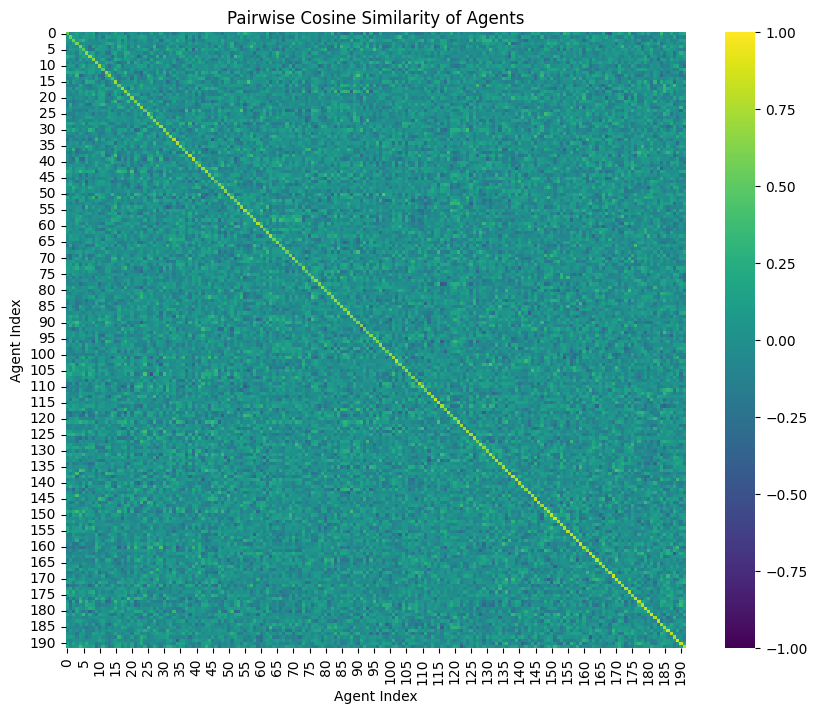

平均两两相似度: 0.6858


In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# q0 = q0.detach().cpu()
q0_norm = torch.nn.functional.normalize(q0, p=2, dim=1)
q200_norm = torch.nn.functional.normalize(q200, p=2, dim=1)

sim_matrix = torch.mm(q0_norm, q200_norm.t()).numpy()


# 绘图
plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, cmap='viridis', vmin=-1, vmax=1)
plt.title("Pairwise Cosine Similarity of Agents")
plt.xlabel("Agent Index")
plt.ylabel("Agent Index")
plt.show()

# 打印平均非对角线相似度
mask = np.eye(sim_matrix.shape[0], dtype=bool)
avg_sim = sim_matrix[mask].mean()
print(f"平均两两相似度: {avg_sim:.4f}")